# Library and Data Imports and Standardization

In [1]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import lasso regression
from sklearn.linear_model import Lasso

# Import Ridge regression
from sklearn.linear_model import Ridge

# Import ElasticNet regression
from sklearn.linear_model import ElasticNet

# Import RepeatedKFold for cross-validation
from sklearn.model_selection import RepeatedKFold

# Import the train_test_split function
from sklearn.model_selection import train_test_split

# Pickle the best models for each dataset
import pickle

from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression

from pprint import pprint

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the datasets
online_abusive_attacks = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/online_abusive_attacks_final.csv')

In [3]:
online_abusive_attacks.head()

,followers_count,friends_count,verified,statuses_count,women,love,news,account,feminist,official,follow,products,tweets,womens,Toxicity
0,39632.0,15271.0,0,71848.0,0,0,0,0,0,0,0,0,0,0,0.0
1,20606.0,9472.0,0,167382.0,0,0,0,0,0,0,0,0,0,0,13.0
2,20445.0,9396.0,0,165314.0,0,0,0,0,0,0,0,0,0,0,45.0
3,20506.0,9430.0,0,166164.0,0,0,0,0,0,0,0,0,0,0,49.0
4,20583.0,9469.0,0,167488.0,0,0,0,0,0,0,0,0,0,0,7.0


In [4]:
online_abusive_attacks_X = online_abusive_attacks.drop("Toxicity", axis=1)
online_abusive_attacks_y = online_abusive_attacks["Toxicity"]

# Linear Modeling

In [5]:
# Get only the numeric features for each dataset
online_abusive_attacks_X_numeric = online_abusive_attacks_X.select_dtypes(include=np.number)

In [6]:
# Use standard scaler on the online abusive attacks X data
oaa_scaler = StandardScaler()
online_abusive_attacks_X_scaled = oaa_scaler.fit_transform(online_abusive_attacks_X_numeric)
online_abusive_attacks_X_scaled = pd.DataFrame(online_abusive_attacks_X_scaled, columns=online_abusive_attacks_X_numeric.columns)

In [7]:
for columns in [online_abusive_attacks_X_numeric.columns]:
  print(columns)

Index(['followers_count', 'friends_count', 'verified', 'statuses_count',
       'women', 'love', 'news', 'account', 'feminist', 'official', 'follow',
       'products', 'tweets', 'womens'],
      dtype='object')


In [8]:
# Train test split for each dataset
online_abusive_attacks_X_train, online_abusive_attacks_X_test, online_abusive_attacks_y_train, online_abusive_attacks_y_test = train_test_split(online_abusive_attacks_X_scaled, online_abusive_attacks_y, test_size=0.2, random_state=42)

In [9]:
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score, greater_is_better=True)


In [10]:
online_abusive_attacks_lasso_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
online_abusive_attacks_ridge_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
online_abusive_attacks_elasticnet_cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

## Online Abusive Attacks Lasso Regresion

In [11]:
online_abusive_attacks_lasso = Lasso()

online_abusive_attacks_lasso_param_grid = {
    "alpha": [0.01],  # Regularization strength
    "max_iter": range(1, 20),  # Number of iterations
    "tol": [1e-4]  # Tolerance for optimization
}

online_abusive_attacks_lasso_regressor = GridSearchCV(
    online_abusive_attacks_lasso,
    param_grid=online_abusive_attacks_lasso_param_grid,
    scoring=r2_scorer,
    cv=online_abusive_attacks_lasso_cv,
    n_jobs=-1,  # Speeds up computation using all cores
    verbose=1   # (Optional) Shows progress
)

In [12]:
online_abusive_attacks_lasso_regressor.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)

Fitting 50 folds for each of 19 candidates, totalling 950 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=42),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01], 'max_iter': range(1, 20),
                         'tol': [0.0001]},
             scoring=make_scorer(r2_score, response_method='predict'),
             verbose=1)

In [13]:
pprint(online_abusive_attacks_lasso_regressor.cv_results_["params"])

[{'alpha': 0.01, 'max_iter': 1, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 2, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 3, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 4, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 5, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 6, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 7, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 8, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 9, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 10, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 11, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 12, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 13, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 14, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 15, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 16, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 17, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 18, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 19, 'tol': 0.0001}]


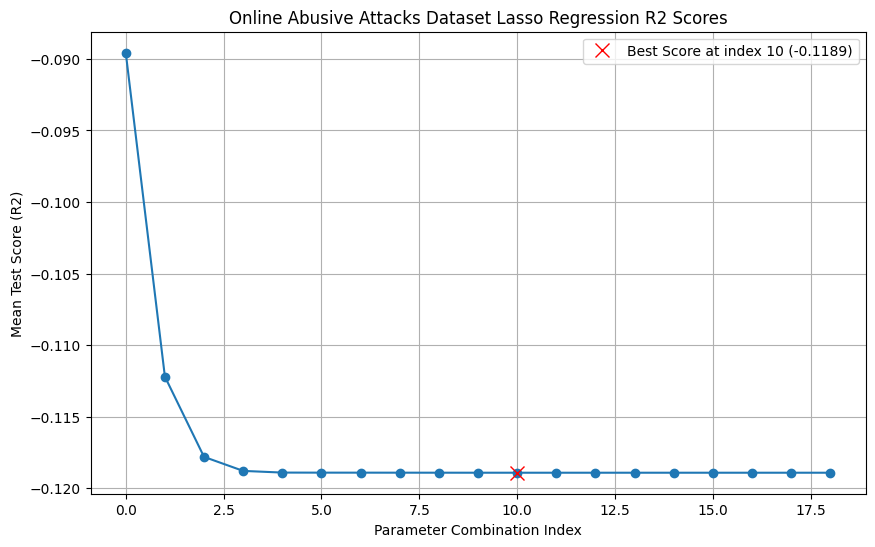

In [14]:
# Graph the scoring results
plt.figure(figsize=(10, 6))
# Flip the sign of the mean test score to plot RMSE
plt.plot(-online_abusive_attacks_lasso_regressor.cv_results_['mean_test_score'], marker='o')
# Plot the best score as a red x
plt.plot(online_abusive_attacks_lasso_regressor.best_index_, -online_abusive_attacks_lasso_regressor.best_score_, 'rx', markersize=10, label=f"Best Score at index {online_abusive_attacks_lasso_regressor.best_index_} ({-online_abusive_attacks_lasso_regressor.best_score_:.4f})")
plt.legend()
plt.title('Online Abusive Attacks Dataset Lasso Regression R2 Scores')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Test Score (R2)')
plt.grid()
plt.show()

In [15]:
online_abusive_attacks_lasso_best_score = -online_abusive_attacks_lasso_regressor.best_score_
online_abusive_attacks_lasso_best_params = online_abusive_attacks_lasso_regressor.best_params_
online_abusive_attacks_lasso_best_estimator = online_abusive_attacks_lasso_regressor.best_estimator_
online_abusive_attacks_lasso_best_estimator

Lasso(alpha=0.01, max_iter=11)

In [16]:
# Print the best score and parameters for Online Abusive Attacks Lasso Regression
print(f"Lasso Regression Best Score (Online Abusive Attacks): {-online_abusive_attacks_lasso_best_score:.2f}")
print(f"Lasso Regression Best Parameters (Online Abusive Attacks): {online_abusive_attacks_lasso_best_params}")

Lasso Regression Best Score (Online Abusive Attacks): 0.12
Lasso Regression Best Parameters (Online Abusive Attacks): {'alpha': 0.01, 'max_iter': 11, 'tol': 0.0001}


In [17]:
# Predict on the test data using the best estimator
online_abusive_attacks_lasso_predictions = online_abusive_attacks_lasso_best_estimator.predict(online_abusive_attacks_X_test)

# Calculate the RMSE and R2 score for Online Abusive Attacks Lasso Regression
online_abusive_attacks_lasso_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_lasso_predictions)
online_abusive_attacks_lasso_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_lasso_predictions)

# Print the RMSE score for Online Abusive Attacks Lasso Regression
print(f"Lasso Regression RMSE (Online Abusive Attacks): {online_abusive_attacks_lasso_rmse:.2f}")
print(f"Lasso Regression R2 Score (Online Abusive Attacks): {online_abusive_attacks_lasso_r2:.2f}")

Lasso Regression RMSE (Online Abusive Attacks): 25.18
Lasso Regression R2 Score (Online Abusive Attacks): 0.25


In [18]:
# Get the coefficients and intercept of Online Abusive Attacks Lasso Regression
online_abusive_attacks_lasso_coefficients = online_abusive_attacks_lasso_best_estimator.coef_
online_abusive_attacks_lasso_intercept = online_abusive_attacks_lasso_best_estimator.intercept_

# Print the coefficients and intercept of Online Abusive Attacks Lasso Regression
print("Lasso Regression Coefficients:")
for feature, coef in zip(online_abusive_attacks_X_train.columns, online_abusive_attacks_lasso_coefficients):
    print(f"{feature}: {coef:.4f}")

Lasso Regression Coefficients:
followers_count: 17.0737
friends_count: -0.0563
verified: 7.2712
statuses_count: 4.7106
women: -1.7563
love: -0.1452
news: 0.1249
account: 1.5780
feminist: -0.2409
official: 0.3680
follow: -1.7923
products: -0.3037
tweets: -0.1028
womens: -0.9708


In [19]:
# Filter for features with lasso regression coefficients above 0:
online_abusive_attacks_lasso_significant_features = online_abusive_attacks_X_train.columns[online_abusive_attacks_lasso_coefficients != 0]
online_abusive_attacks_lasso_significant_features

Index(['followers_count', 'friends_count', 'verified', 'statuses_count',
       'women', 'love', 'news', 'account', 'feminist', 'official', 'follow',
       'products', 'tweets', 'womens'],
      dtype='object')

In [20]:
online_abusive_attacks_lasso_features = online_abusive_attacks_X_train[online_abusive_attacks_lasso_significant_features]
online_abusive_attacks_lasso_features.head()

,followers_count,friends_count,verified,statuses_count,women,love,news,account,feminist,official,follow,products,tweets,womens
1114,-0.141590,-0.449326,-0.300311,-0.472212,-0.290013,-0.188436,-0.166593,-0.177167,-0.177167,-0.15967,-0.152465,-0.158253,-0.153931,-0.158253
979,-0.137503,-0.358969,-0.300311,-0.460086,-0.290013,-0.188436,-0.166593,-0.177167,-0.177167,-0.15967,-0.152465,-0.158253,-0.153931,-0.158253
1672,-0.139565,-0.169356,-0.300311,0.380486,-0.290013,-0.188436,-0.166593,-0.177167,-0.177167,-0.15967,6.558877,-0.158253,-0.153931,-0.158253
49,-0.140329,-0.179852,-0.300311,-0.265523,-0.290013,-0.188436,-0.166593,-0.177167,-0.177167,-0.15967,-0.152465,-0.158253,-0.153931,-0.158253
906,-0.125564,-0.079455,-0.300311,-0.465072,3.448116,-0.188436,-0.166593,-0.177167,-0.177167,-0.15967,-0.152465,-0.158253,-0.153931,-0.158253


In [21]:
# Get the X_test version of the online_abusive_attacks_lasso_features
online_abusive_attacks_lasso_X_test = online_abusive_attacks_X_test[online_abusive_attacks_lasso_significant_features]

In [22]:
# Perform linear regression on the online_abusive_attacks_lasso_features
online_abusive_attacks_lasso_linear_model = LinearRegression()
online_abusive_attacks_lasso_linear_model.fit(online_abusive_attacks_lasso_features, online_abusive_attacks_y_train)

LinearRegression()

In [23]:
# Predict on online_abusive_attacks_ridge_linear_model
online_abusive_attacks_lasso_linear_predictions = online_abusive_attacks_lasso_linear_model.predict(online_abusive_attacks_lasso_X_test)

# Get the RMSE and R2 scores
online_abusive_attacks_lasso_linear_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_lasso_linear_predictions)
online_abusive_attacks_lasso_linear_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_lasso_linear_predictions)

# Print
print(f"Linear Regression RMSE (Online Abusive Attacks): {online_abusive_attacks_lasso_linear_rmse:.2f}")
print(f"Linear Regression R2 Score (Online Abusive Attacks): {online_abusive_attacks_lasso_linear_r2:.2f}")

Linear Regression RMSE (Online Abusive Attacks): 25.18
Linear Regression R2 Score (Online Abusive Attacks): 0.25


## Online Abusive Attacks Ridge Regression

In [24]:
online_abusive_attacks_ridge = Ridge()

online_abusive_attacks_ridge_param_grid = {
    "alpha": [0.01],  # Regularization strength
    "max_iter": range(1, 20),  # Number of iterations
    "tol": [1e-4]  # Tolerance for optimization
}

online_abusive_attacks_ridge_regressor = GridSearchCV(
    online_abusive_attacks_ridge,
    param_grid=online_abusive_attacks_ridge_param_grid,
    scoring=r2_scorer,
    cv=online_abusive_attacks_ridge_cv,
    n_jobs=-1,  # Speeds up computation using all cores
    verbose=1   # (Optional) Shows progress
)

In [25]:
online_abusive_attacks_ridge_regressor.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)

Fitting 50 folds for each of 19 candidates, totalling 950 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=42),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01], 'max_iter': range(1, 20),
                         'tol': [0.0001]},
             scoring=make_scorer(r2_score, response_method='predict'),
             verbose=1)

In [26]:
pprint(online_abusive_attacks_ridge_regressor.cv_results_["params"])

[{'alpha': 0.01, 'max_iter': 1, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 2, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 3, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 4, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 5, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 6, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 7, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 8, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 9, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 10, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 11, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 12, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 13, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 14, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 15, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 16, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 17, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 18, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 19, 'tol': 0.0001}]


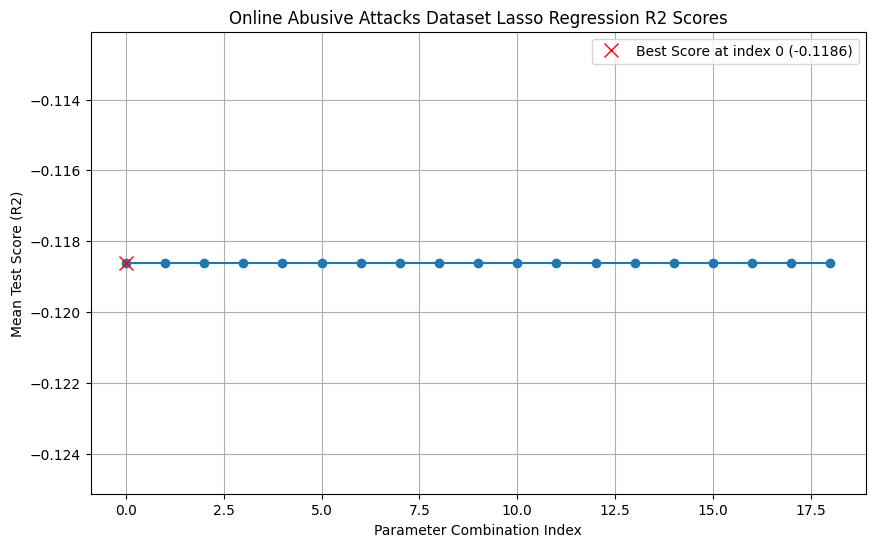

In [27]:
# Graph the scoring results
plt.figure(figsize=(10, 6))
# Flip the sign of the mean test score to plot R2
plt.plot(-online_abusive_attacks_ridge_regressor.cv_results_['mean_test_score'], marker='o')
# Plot the best score as a red x
plt.plot(online_abusive_attacks_ridge_regressor.best_index_, -online_abusive_attacks_ridge_regressor.best_score_, 'rx', markersize=10, label=f"Best Score at index {online_abusive_attacks_ridge_regressor.best_index_} ({-online_abusive_attacks_ridge_regressor.best_score_:.4f})")
plt.legend()
plt.title('Online Abusive Attacks Dataset Lasso Regression R2 Scores')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Test Score (R2)')
plt.grid()
plt.show()

In [28]:
online_abusive_attacks_ridge_best_score = -online_abusive_attacks_ridge_regressor.best_score_
online_abusive_attacks_ridge_best_params = online_abusive_attacks_ridge_regressor.best_params_
online_abusive_attacks_ridge_best_estimator = online_abusive_attacks_ridge_regressor.best_estimator_
online_abusive_attacks_ridge_best_estimator

Ridge(alpha=0.01, max_iter=1)

In [29]:
# Print the best score and parameters for Online Abusive Attacks Ridge Regression
print(f"Lasso Regression Best Score (Online Abusive Attacks): {-online_abusive_attacks_ridge_best_score:.2f}")
print(f"Lasso Regression Best Parameters (Online Abusive Attacks): {online_abusive_attacks_ridge_best_params}")

Lasso Regression Best Score (Online Abusive Attacks): 0.12
Lasso Regression Best Parameters (Online Abusive Attacks): {'alpha': 0.01, 'max_iter': 1, 'tol': 0.0001}


In [30]:
# Predict on the test data using the best estimator
online_abusive_attacks_ridge_predictions = online_abusive_attacks_ridge_best_estimator.predict(online_abusive_attacks_X_test)

# Calculate the RMSE and R2 score for Online Abusive Attacks Ridge Regression
online_abusive_attacks_ridge_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_ridge_predictions)
online_abusive_attacks_ridge_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_ridge_predictions)

# Print the RMSE score for Online Abusive Attacks Ridge Regression
print(f"Lasso Regression RMSE (Online Abusive Attacks): {online_abusive_attacks_ridge_rmse:.2f}")
print(f"Lasso Regression R2 Score (Online Abusive Attacks): {online_abusive_attacks_ridge_r2:.2f}")

Lasso Regression RMSE (Online Abusive Attacks): 25.18
Lasso Regression R2 Score (Online Abusive Attacks): 0.25


In [31]:
# Get the coefficients and intercept of Online Abusive Attacks Ridge Regression
online_abusive_attacks_ridge_coefficients = online_abusive_attacks_ridge_best_estimator.coef_
online_abusive_attacks_ridge_intercept = online_abusive_attacks_ridge_best_estimator.intercept_

# Print the coefficients and intercept of Online Abusive Attacks Ridge Regression
print("Lasso Regression Coefficients:")
for feature, coef in zip(online_abusive_attacks_X_train.columns, online_abusive_attacks_ridge_coefficients):
    print(f"{feature}: {coef:.4f}")

Lasso Regression Coefficients:
followers_count: 17.0756
friends_count: -0.0677
verified: 7.2791
statuses_count: 4.7205
women: -1.7635
love: -0.1557
news: 0.1310
account: 1.5833
feminist: -0.2518
official: 0.3702
follow: -1.8026
products: -0.3130
tweets: -0.1115
womens: -0.9798


In [32]:
# Filter for features with ridge regression coefficients above 0:
online_abusive_attacks_ridge_significant_features = online_abusive_attacks_X_train.columns[online_abusive_attacks_ridge_coefficients > 0]
online_abusive_attacks_ridge_significant_features

Index(['followers_count', 'verified', 'statuses_count', 'news', 'account',
       'official'],
      dtype='object')

In [33]:
online_abusive_attacks_ridge_features = online_abusive_attacks_X_train[online_abusive_attacks_ridge_significant_features]
online_abusive_attacks_ridge_features.head()

,followers_count,verified,statuses_count,news,account,official
1114,-0.141590,-0.300311,-0.472212,-0.166593,-0.177167,-0.15967
979,-0.137503,-0.300311,-0.460086,-0.166593,-0.177167,-0.15967
1672,-0.139565,-0.300311,0.380486,-0.166593,-0.177167,-0.15967
49,-0.140329,-0.300311,-0.265523,-0.166593,-0.177167,-0.15967
906,-0.125564,-0.300311,-0.465072,-0.166593,-0.177167,-0.15967


In [34]:
# Get the X_test version of the online_abusive_attacks_ridge_features
online_abusive_attacks_ridge_X_test = online_abusive_attacks_X_test[online_abusive_attacks_ridge_significant_features]

In [35]:
# Perform linear regression on the online_abusive_attacks_ridge_features
online_abusive_attacks_ridge_linear_model = LinearRegression()
online_abusive_attacks_ridge_linear_model.fit(online_abusive_attacks_ridge_features, online_abusive_attacks_y_train)

LinearRegression()

In [36]:
# Predict on online_abusive_attacks_ridge_linear_model
online_abusive_attacks_ridge_linear_predictions = online_abusive_attacks_ridge_linear_model.predict(online_abusive_attacks_ridge_X_test)

# Get the RMSE and R2 scores
online_abusive_attacks_ridge_linear_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_ridge_linear_predictions)
online_abusive_attacks_ridge_linear_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_ridge_linear_predictions)

# Print
print(f"Linear Regression RMSE (Online Abusive Attacks): {online_abusive_attacks_ridge_linear_rmse:.2f}")
print(f"Linear Regression R2 Score (Online Abusive Attacks): {online_abusive_attacks_ridge_linear_r2:.2f}")

Linear Regression RMSE (Online Abusive Attacks): 25.07
Linear Regression R2 Score (Online Abusive Attacks): 0.25


## Online Abusive Attacks ElasticNet Regression

In [37]:
online_abusive_attacks_elasticnet = ElasticNet()

online_abusive_attacks_elasticnet_param_grid = {
    "alpha": [0.01],  # Regularization strength
    "max_iter": range(1, 20),  # Number of iterations
    "tol": [1e-4]  # Tolerance for optimization
}

online_abusive_attacks_elasticnet_regressor = GridSearchCV(
    online_abusive_attacks_elasticnet,
    param_grid=online_abusive_attacks_elasticnet_param_grid,
    scoring=r2_scorer,
    cv=online_abusive_attacks_elasticnet_cv,
    n_jobs=-1,  # Speeds up computation using all cores
    verbose=1   # (Optional) Shows progress
)

In [38]:
online_abusive_attacks_elasticnet_regressor.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)

Fitting 50 folds for each of 19 candidates, totalling 950 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=42),
             estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.01], 'max_iter': range(1, 20),
                         'tol': [0.0001]},
             scoring=make_scorer(r2_score, response_method='predict'),
             verbose=1)

In [39]:
pprint(online_abusive_attacks_elasticnet_regressor.cv_results_["params"])

[{'alpha': 0.01, 'max_iter': 1, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 2, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 3, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 4, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 5, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 6, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 7, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 8, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 9, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 10, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 11, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 12, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 13, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 14, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 15, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 16, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 17, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 18, 'tol': 0.0001},
 {'alpha': 0.01, 'max_iter': 19, 'tol': 0.0001}]


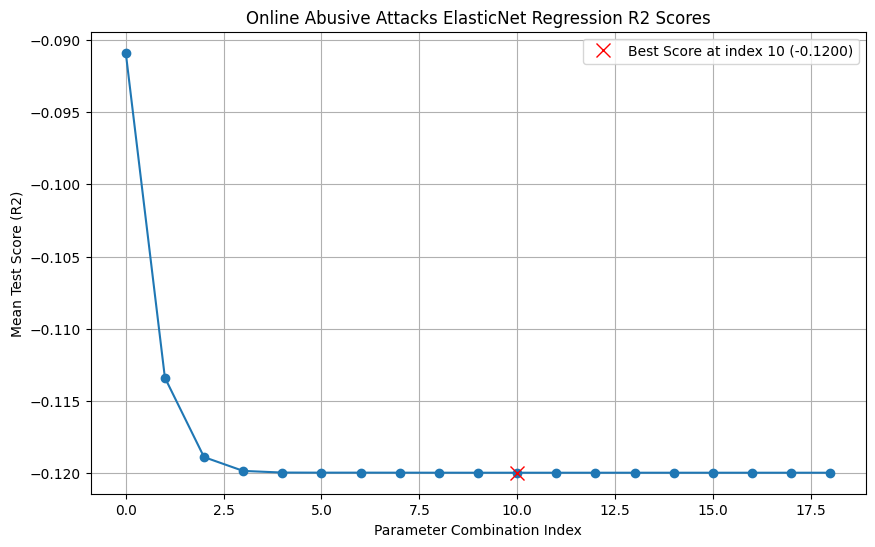

In [40]:
# Graph the scoring results
plt.figure(figsize=(10, 6))
# Flip the sign of the mean test score to plot R2
plt.plot(-online_abusive_attacks_elasticnet_regressor.cv_results_['mean_test_score'], marker='o')
# Plot the best score as a red x
plt.plot(online_abusive_attacks_elasticnet_regressor.best_index_, -online_abusive_attacks_elasticnet_regressor.best_score_, 'rx', markersize=10, label=f"Best Score at index {online_abusive_attacks_elasticnet_regressor.best_index_} ({-online_abusive_attacks_elasticnet_regressor.best_score_:.4f})")
plt.legend()
plt.title('Online Abusive Attacks ElasticNet Regression R2 Scores')
plt.xlabel('Parameter Combination Index')
plt.ylabel('Mean Test Score (R2)')
plt.grid()
plt.show()

In [41]:
online_abusive_attacks_elasticnet_best_score = -online_abusive_attacks_elasticnet_regressor.best_score_
online_abusive_attacks_elasticnet_best_params = online_abusive_attacks_elasticnet_regressor.best_params_
online_abusive_attacks_elasticnet_best_estimator = online_abusive_attacks_elasticnet_regressor.best_estimator_
online_abusive_attacks_elasticnet_best_estimator

ElasticNet(alpha=0.01, max_iter=11)

In [42]:
# Print the best score and parameters for the Lasso Regression model on the UTD19 training dataset
print(f"Online Abusive Attacks ElasticNet Regression Best Score: {-online_abusive_attacks_elasticnet_best_score:.2f}")
print(f"Online Abusive Attacks ElasticNet Regression Best Parameters: {online_abusive_attacks_elasticnet_best_params}")

Online Abusive Attacks ElasticNet Regression Best Score: 0.12
Online Abusive Attacks ElasticNet Regression Best Parameters: {'alpha': 0.01, 'max_iter': 11, 'tol': 0.0001}


In [43]:
# Predict on the test data using the best estimator
online_abusive_attacks_elasticnet_predictions = online_abusive_attacks_elasticnet_best_estimator.predict(online_abusive_attacks_X_test)

# Calculate the RMSE and R2 score for Online Abusive Attacks ElasticNet Regression
online_abusive_attacks_elasticnet_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_elasticnet_predictions)
online_abusive_attacks_elasticnet_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_elasticnet_predictions)

# Print the RMSE score for Online Abusive Attacks ElasticNet Regression
print(f"Online Abusive Attacks ElasticNet Regression RMSE: {online_abusive_attacks_elasticnet_rmse:.2f}")
print(f"Online Abusive Attacks ElasticNet Regression R2 Score: {online_abusive_attacks_elasticnet_r2:.2f}")

Online Abusive Attacks ElasticNet Regression RMSE: 25.18
Online Abusive Attacks ElasticNet Regression R2 Score: 0.25


In [44]:
# Get the coefficients and intercept of Online Abusive Attacks ElasticNet Regression
online_abusive_attacks_elasticnet_coefficients = online_abusive_attacks_elasticnet_best_estimator.coef_
online_abusive_attacks_elasticnet_intercept = online_abusive_attacks_elasticnet_best_estimator.intercept_

# Print the coefficients and intercept of Online Abusive Attacks ElasticNet Regression
print("Online Abusive Attacks ElasticNet Regression Coefficients:")
for feature, coef in zip(online_abusive_attacks_X_train.columns, online_abusive_attacks_elasticnet_coefficients):
    print(f"{feature}: {coef:.4f}")

Online Abusive Attacks ElasticNet Regression Coefficients:
followers_count: 16.9959
friends_count: -0.0598
verified: 7.2633
statuses_count: 4.7006
women: -1.7517
love: -0.1516
news: 0.1413
account: 1.5723
feminist: -0.2459
official: 0.4001
follow: -1.7815
products: -0.3089
tweets: -0.1079
womens: -0.9712


In [45]:
# Filter for features with lasso regression coefficients above 0:
online_abusive_attacks_elasticnet_significant_features = online_abusive_attacks_X_train.columns[online_abusive_attacks_elasticnet_coefficients > 0]
online_abusive_attacks_elasticnet_significant_features

Index(['followers_count', 'verified', 'statuses_count', 'news', 'account',
       'official'],
      dtype='object')

In [46]:
online_abusive_attacks_elasticnet_features = online_abusive_attacks_X_train[online_abusive_attacks_elasticnet_significant_features]
online_abusive_attacks_elasticnet_features.head()

,followers_count,verified,statuses_count,news,account,official
1114,-0.141590,-0.300311,-0.472212,-0.166593,-0.177167,-0.15967
979,-0.137503,-0.300311,-0.460086,-0.166593,-0.177167,-0.15967
1672,-0.139565,-0.300311,0.380486,-0.166593,-0.177167,-0.15967
49,-0.140329,-0.300311,-0.265523,-0.166593,-0.177167,-0.15967
906,-0.125564,-0.300311,-0.465072,-0.166593,-0.177167,-0.15967


In [47]:
# Get the X_test version of the online_abusive_attacks_lasso_features
online_abusive_attacks_elasticnet_X_test = online_abusive_attacks_X_test[online_abusive_attacks_elasticnet_significant_features]

In [48]:
# Perform linear regression on the online_abusive_attacks_lasso_features
online_abusive_attacks_elasticnet_linear_model = LinearRegression()
online_abusive_attacks_elasticnet_linear_model.fit(online_abusive_attacks_elasticnet_features, online_abusive_attacks_y_train)

LinearRegression()

In [49]:
# Predict on online_abusive_attacks_ridge_linear_model
online_abusive_attacks_elasticnet_linear_predictions = online_abusive_attacks_elasticnet_linear_model.predict(online_abusive_attacks_elasticnet_X_test)

# Get the RMSE and R2 scores
online_abusive_attacks_elasticnet_linear_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_elasticnet_linear_predictions)
online_abusive_attacks_elasticnet_linear_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_elasticnet_linear_predictions)

# Print
print(f"Linear Regression RMSE (Convabuse): {online_abusive_attacks_elasticnet_linear_rmse:.2f}")
print(f"Linear Regression R2 Score (Convabuse): {online_abusive_attacks_elasticnet_linear_r2:.2f}")

Linear Regression RMSE (Convabuse): 25.07
Linear Regression R2 Score (Convabuse): 0.25


## Feature Regression Model Summary

In [50]:
# Create a feature regression model dictionary where each dataset maps to its RMSE and R2
feature_regression_model_summary_data = [
    {
        "Model": "Lasso Regularization",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_lasso_rmse,
        "R2": online_abusive_attacks_lasso_r2
    },
    {
        "Model": "Ridge Regularization",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_ridge_rmse,
        "R2": online_abusive_attacks_ridge_r2
    },
    {
        "Model": "ElasticNet Regularization",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_elasticnet_rmse,
        "R2": online_abusive_attacks_elasticnet_r2
    }
]

# Convert to DataFrame (datasets become rows, metrics are columns)
feature_regression_model_summary = pd.DataFrame(feature_regression_model_summary_data)
feature_regression_model_summary

,Model,Dataset,RMSE,R2
0,Lasso Regularization,Online Abusive Attacks,25.179175,0.247392
1,Ridge Regularization,Online Abusive Attacks,25.184473,0.247076
2,ElasticNet Regularization,Online Abusive Attacks,25.178478,0.247434


In [51]:
# Create a linear regression model dictionary where each dataset maps to its RMSE and R2
linear_regression_model_summary_data = [
    {
        "Model": "Linear Lasso Regression",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_lasso_linear_rmse,
        "R2": online_abusive_attacks_lasso_linear_r2
    },
    {
        "Model": "Linear Ridge Regression",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_ridge_linear_rmse,
        "R2": online_abusive_attacks_ridge_linear_r2
    },
    {
        "Model": "Linear ElasticNet Regression",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_elasticnet_linear_rmse,
        "R2": online_abusive_attacks_elasticnet_linear_r2
    }
]

# Convert to DataFrame (datasets become rows, metrics are columns)
linear_regression_model_summary = pd.DataFrame(linear_regression_model_summary_data)
linear_regression_model_summary

,Model,Dataset,RMSE,R2
0,Linear Lasso Regression,Online Abusive Attacks,25.184477,0.247075
1,Linear Ridge Regression,Online Abusive Attacks,25.070423,0.253880
2,Linear ElasticNet Regression,Online Abusive Attacks,25.070423,0.253880


In [52]:
# Compare the feature regression and linear regression model results for RMSE and R2
for model_name in feature_regression_model_summary.index:
    print(f"Model: {model_name}")
    feature_regression_rmse = feature_regression_model_summary.loc[model_name, "RMSE"]
    feature_regression_r2 = feature_regression_model_summary.loc[model_name, "R2"]
    linear_regression_rmse = linear_regression_model_summary.loc[model_name, "RMSE"]
    linear_regression_r2 = linear_regression_model_summary.loc[model_name, "R2"]
    if feature_regression_rmse > linear_regression_rmse:
      print(f"Feature Regularization RMSE: {feature_regression_rmse:.2f} > Linear Regression RMSE: {linear_regression_rmse:.2f}")
      print(f"Feature Regularization yielded the worse RMSE score")
    else:
      print(f"Feature Regression RMSE: {feature_regression_rmse:.2f} < Linear Regression RMSE: {linear_regression_rmse:.2f}")
      print(f"Linear Regression yielded the worse RMSE score")
    if feature_regression_r2 > linear_regression_r2:
      print(f"Feature Regularization R2: {feature_regression_r2:.2f} > Linear Regression R2: {linear_regression_r2:.2f}")
      print(f"Feature Regularization yielded the better R2 score")
    else:
      print(f"Feature Regularization R2: {feature_regression_r2:.2f} < Linear Regression R2: {linear_regression_r2:.2f}")
      print(f"Linear Regression yielded the better R2 score")
    print()

Model: 0
Feature Regression RMSE: 25.18 < Linear Regression RMSE: 25.18
Linear Regression yielded the worse RMSE score
Feature Regularization R2: 0.25 > Linear Regression R2: 0.25
Feature Regularization yielded the better R2 score

Model: 1
Feature Regularization RMSE: 25.18 > Linear Regression RMSE: 25.07
Feature Regularization yielded the worse RMSE score
Feature Regularization R2: 0.25 < Linear Regression R2: 0.25
Linear Regression yielded the better R2 score

Model: 2
Feature Regularization RMSE: 25.18 > Linear Regression RMSE: 25.07
Feature Regularization yielded the worse RMSE score
Feature Regularization R2: 0.25 < Linear Regression R2: 0.25
Linear Regression yielded the better R2 score



In [53]:
# Determine the model with the best R2 score for Online Abusive Attacks
online_abusive_attacks_models = ["Online Abusive Attacks Lasso Regression", "Online Abusive Attacks Ridge Regression", "Online Abusive Attacks ElasticNet Regression"]
online_abusive_attacks_r2_scores = online_abusive_attacks_lasso_r2, online_abusive_attacks_ridge_r2, online_abusive_attacks_elasticnet_r2
best_online_abusive_attacks_r2 = max(online_abusive_attacks_r2_scores)
best_online_abusive_attacks_r2_index = online_abusive_attacks_r2_scores.index(best_online_abusive_attacks_r2)
best_online_abusive_attacks_model = online_abusive_attacks_models[best_online_abusive_attacks_r2_index]
print(f"The {best_online_abusive_attacks_model} model has the best R2 score for Online Abusive Attacks: {best_online_abusive_attacks_r2:.2f}")

The Online Abusive Attacks ElasticNet Regression model has the best R2 score for Online Abusive Attacks: 0.25


In [54]:
# Combine the feature_regression_model_summary and the linear_regression_model_summary
feature_regularization_summary = pd.concat([feature_regression_model_summary, linear_regression_model_summary], axis=0)
feature_regularization_summary

,Model,Dataset,RMSE,R2
0,Lasso Regularization,Online Abusive Attacks,25.179175,0.247392
1,Ridge Regularization,Online Abusive Attacks,25.184473,0.247076
2,ElasticNet Regularization,Online Abusive Attacks,25.178478,0.247434
0,Linear Lasso Regression,Online Abusive Attacks,25.184477,0.247075
1,Linear Ridge Regression,Online Abusive Attacks,25.070423,0.253880
2,Linear ElasticNet Regression,Online Abusive Attacks,25.070423,0.253880


In [55]:
# Output the feature_regularization_summary
feature_regularization_summary.to_csv("/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/results/model2_feature-regularization-summary.csv", index=False)